# L'extension [scikit-learn](https://scikit-learn.org/stable/index.html) pour l'apprentissage automatique

L'extension [scikit-learn](https://scikit-learn.org/stable/index.html) permet de faire de l'apprentissage automatique, appelé *machine learning* en anglais. L'apprentissage automatique regroupe les méthodes qui construisent des modèles de prédiction à partir de données.

[L'introduction de ce module](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) donne le vocabulaire qu'il faut connaître pour ce domaine.

On peut en retenir que les apprentissages automatiques se divisent en deux catégories principales :

- l'apprentissage supervisé (*supervised learning*) pour lequel une première phase va construire un modèle à partir de données dont on connait le résultat
- l'apprentissage non-supervisé (*unsupervised learning*) dans lequel on demandera à la machine de trouver par elle même des caractéristiques intéressantes dans le jeu de données.

Ces notes reprennent les exemples présentés sur l'excellent tutoriel de [machine learnia](https://www.youtube.com/watch?v=P6kSc3qVph0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=20) et qui montre une utilisation progressive des concepts les plus ellaborés de [scikit-learn](https://scikit-learn.org/stable/index.html) pour la partie apprentissage supervisé.


# Un premier exemple d'apprentissage avec les régressions

La régression est un premier exemple où à partir de donnée : on détermine un modèle qui est l'équation de la droite de régression recherchée et qui permettra ensuite de faire des prédictions sur des nouvelles données.

Nous construisons ici un jeu de données pour y appliquer ensuite une regression linéaire. Il s'agit finalement d'un apprentissage supervisé élémentaire : à partir d'un jeu de données, on passe par une phase d'apprentissage qui va calculer la droite ou la courbe de regression, qui sera finalement le modèle qui servira plus tard à faire des prédictions.

Dans tous ces exemples, lLa notation sera toujours la suivante:
- `X` : la matrice donnant le jeu de données
- `y` : le vecteur des résultats attendus pour le jeu de test

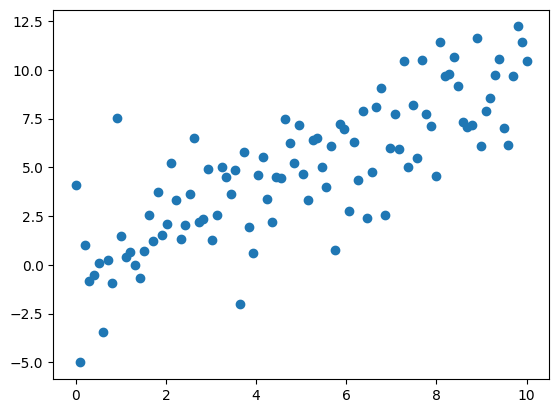

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ancienne méthode
# np.random.seed(0)
# y = X + np.random.randn(m, 1) 

rng = np.random.default_rng(3)  # le générateur de nombres aléatoires
m = 100
X = np.linspace(0, 10, m).reshape(m,1) # attention de bien avoir une matrice
# y = X + 5 * rng.random(m).reshape(m,1)
# y = X + rng.uniform(-3, 3, m).reshape(m,1)
y = X + rng.normal(0, 2, m).reshape(m,1)

plt.scatter(X, y)
plt.show()

La résolution avec *scikit-learn* passera toujours par les phases suivantes :

```python
model = linearRegression(...) # déclaration du modèle et de sa méthode
model.fit(X,y)                # entraînement du modèle
model.score(X,y)              # estimation de la précision du modèle
model.predict(X)              # prédiction à partir du modèle
```

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.6451616159546059

Dans notre cas, nous allons utiliser les prédictions pour construire la droite de régression linéaire.

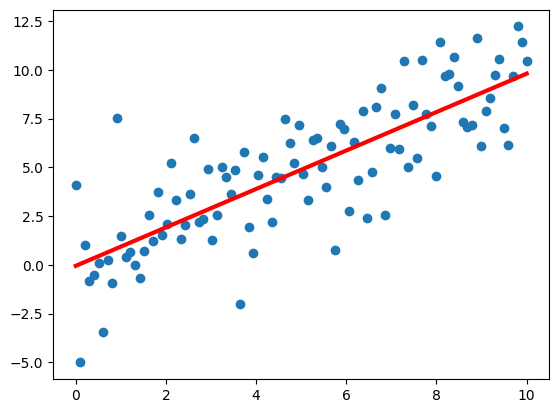

In [3]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red', lw=3)
plt.show()

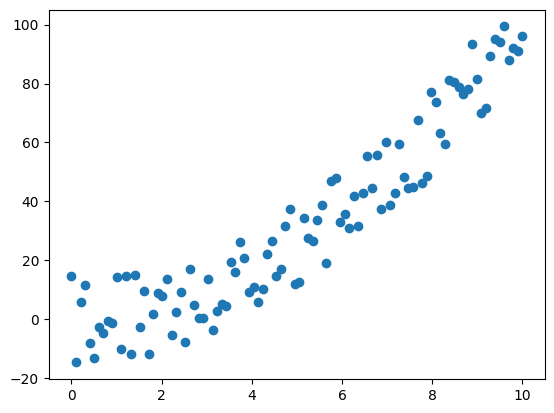

In [7]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1) # attention de bien avoir une matrice
# y = X**2 + 5*np.random.randn(m, 1)  # ancienne méthode
y = X**2 + 5*rng.uniform(-3,3, m).reshape(m,1)
plt.scatter(X, y)
plt.show()

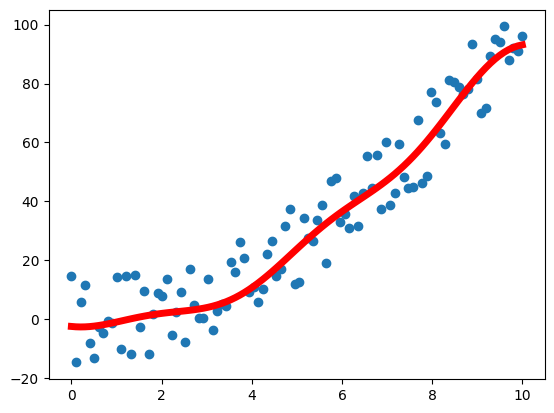

In [8]:
from sklearn.svm import SVR
model = SVR(C=100)
y = y.ravel()  # ici y doit être une liste simple
model.fit(X, y)
model.score(X, y)
model.fit(X, y)
model.score(X, y)

prediction = model.predict(X)

plt.scatter(X,y)
plt.plot(X, prediction, lw=5, c='r')
plt.show()

# Apprentissage avec une classification

Intéressons-nous maintenant à un exemple de classification de données. Nous prenons la liste des passagers du titanic et nous chercherons à prédir en fonction des caractéristiques des passagers leur chance de survivre ou non au naufrage.

Pour cela on va charge les données sur le titanic, qui sont disponibles dans l'extension [Seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html). On ne gardera que les colonnes qui nous semblent pouvoir influencer la chance de survie du passager et on nétoie en éliminant le enrgistrements ayant des données manquantes.

Enfin, on replace les catégoies qualitatives dont les contenus sont des chaînes caractères par des valeurs numériques. Ici on remplace la catégorie *male/female* par les entiers 0/1. Ceci nous permet d'obtenir un tableau ne contenant que des valeurs numériques et qui donc pourra être utilisé plus loin comme un `ndarray`.

In [6]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


On choisit une méthode de recherche dans scikit-learn, ici le [méthode des plus proches voisins](https://scikit-learn.org/stable/modules/neighbors.html) et on définit donc un notre modèle avec [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

Le résultat qu'on veut faire apprendre à notre modèle est la colonne `y` qui est ici la colonne `survived`. Les données `X` sur lesquelles on veut effectuer l'apprentissage, sont les données qui sont dans les autres colonnes. C'est d'elles qu'on veut pouvoir déduire si on aura ou non une chance de survie.

On extrait donc la colonne `survived` et on la supprime du jeu de données avec la méthode [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) utilisée ici selon les colonnes, donc avec `axis=1`.


In [8]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


La phase d'apprentissage de notre model applique donc la méthode [fit](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit) à notre jeu de données `X` avec pour objectif de retrouver les résultats donnés par `y`. Quand cette phase est passée, on regarde le score avec la méthode [score](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score).

Attention, comme nous allons ensuite utiliser des `ndarray`, il faut transformer le `dataframe` en `ndarray` dans le modèle ce qui se fait avec la méthode [to_numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) (qui remplace la méthode [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)).

In [9]:
model.fit(X.to_numpy(),y)
model.score(X.to_numpy(),y)

0.8305322128851541

Nous définissons maintenant une fonction `survie` qui indiquera nos chances de survie en fonction de nos caractéristiques grace à la méthode [predict](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) de notre modèle maintenant entraîné.

In [10]:
import numpy as np

def survie(model, pclass=3, sex=0, age=26):
    x = np.array([pclass, sex, age]).reshape(1,3)
    # ne pas oublier de transformer la ligne simple en tableau de une ligne
    print(model.predict(x))
    print(f'chance de survie : {100*model.predict_proba(x)[0][1]:.0f}%')
    # print(model.predict_proba(x)[0][0])

survie(model, pclass=1, sex=0, age=50)

[0]
chance de survie : 40%


## Optimisation du modèle

On peut améliorer le modèle avec son paramètre `n_neighbors` qui détermine le nombre de voisins à considérer. Lançons plusieurs modélisations pour rechercher le paramètre qui donnera le meilleur score. Ici je sauvegarde les résultats dans une liste, ce qui me permet aussi de voir la tendance.

In [11]:
max=0
N = range(1,20)
score = []
for nb in N:
    model = KNeighborsClassifier(n_neighbors=nb)
    model.fit(X.to_numpy(),y)   # X.values transform dataframe into ndarrays
    SCR = model.score(X.to_numpy(),y)
    score.append(SCR)
    if SCR > max:
        max = SCR
        nb_max = nb

print(f'meilleur résultat pour n_neighbors={nb_max}')

meilleur résultat pour n_neighbors=4


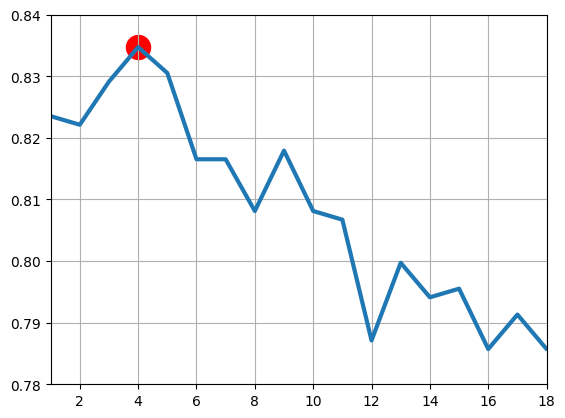

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1,20), score, lw=3)
plt.scatter(nb_max, max, s=300, c='red')
# ax = plt.gca()
plt.grid(visible=True)
plt.axis([1,18, 0.78, 0.84], emit=True, )
plt.show()

On retient donc qu'il faut considérer 4 voisins pour avoir le meilleur résultat.

In [23]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X.to_numpy(),y)
survie(model, pclass=1, sex=0, age=26)

[1]
chance de survie : 100%


# Le jeu d'apprentissage et le jeu de test

Nous venons de voir que nous pouvions améliorer notre modèle par certains hyperparamètres, comme ici le nombre de voisins à considérer. L'enjeu va être maintenant de raffiner notre modèle pour qu'il soit le meilleur possible pour un jeu de données fixés.

Pour que notre modèle soit plus robuste pour une utilisation sur n'importe quel jeu de données, il faut éviter de l'évaluer sur le même jeu de données que celui ayant servi à l'apprentissage. En effet, c'est trop simple et ne correspond pas à ce que nous voulons. On doit donc séparer notre jeu de données initial entre une part servant à l'apprentissage et une autre servant à tester le modèle. La partage est typiquement de 80%/20%.

Il existe dans le module [model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) qui à partir d'un jeu de données $(X,y)$, renvoie un jeu $(X_{train}, y_{train})$ et un jeu de données $(X_{test}, y_{test})$.

Nous allons experimenter sur le jeu de données des fleurs d'Iris, qui se trouve dans [scikit-learn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) prêt à l'emploi.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

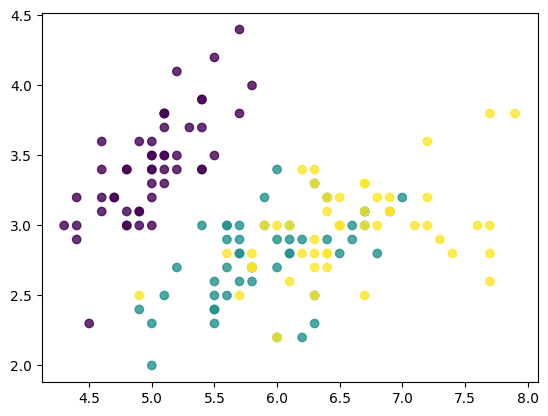

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


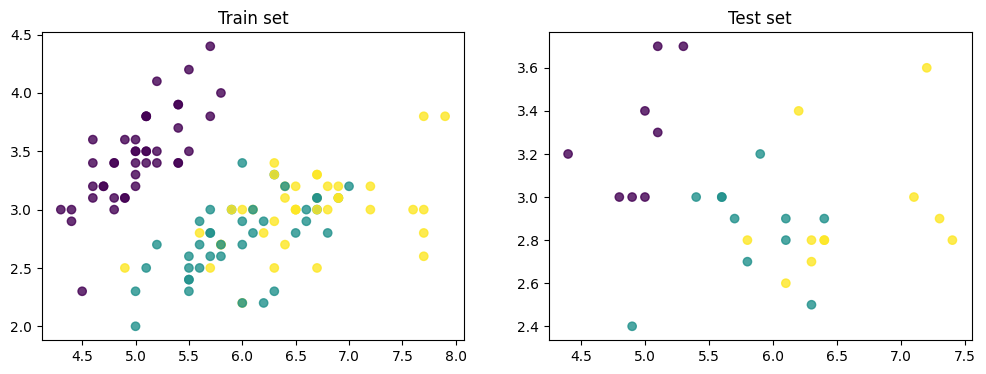

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.show()

In [17]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print('précision du modèle:', model.score(X_test, y_test))

précision du modèle: 0.9666666666666667


# La méthode des validations croisées (*cross validation*)

La [cross validation](https://inside-machinelearning.com/cross-validation/) est un moyen de s'assurer qu'un modèle est au maximum de ses capacités. Usuellement on partage le jeu de données en 5 sous-groupes, les quatres premiers servent à entraîner le modèle. On en retiend celui qui obtient le meilleur score. Le dernier jeu indépendant est conservé pour calculer le score du modèle retenu.

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

# Les courbes de validations

On peut ensuite boucler sur ces validations croisées pour trouver le meilleur hyperparamètre `n_neighbors` de la méthode `KNeighborsClassifier`.

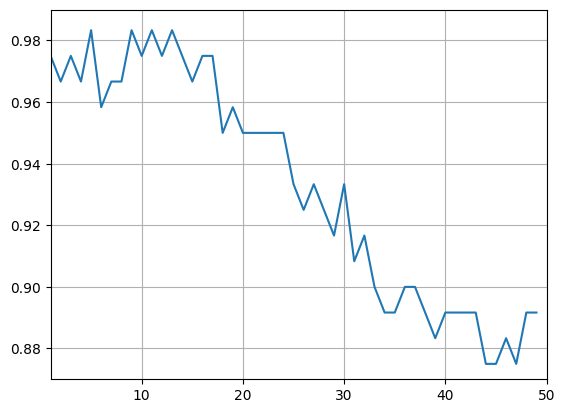

In [27]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(range(1,50), val_score)
plt.grid(visible=True)
plt.axis([1,50, 0.87, 0.99])
plt.show()

On voir sur ce graphe que les meilleurs hyperparamètres sont autour de 10 ou bien à 5 (la première valeur donnant le meilleur résultat).

Le sous module [model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) propose la commande [validation curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) qui permet d'obtenir directement ces courbes en fonction du paramètre qu'on veut faire varier (`param_name`) dans un domaine donné (`param_range`). Il donne même le résultat sur le jeu d'apprentissage et de validation.

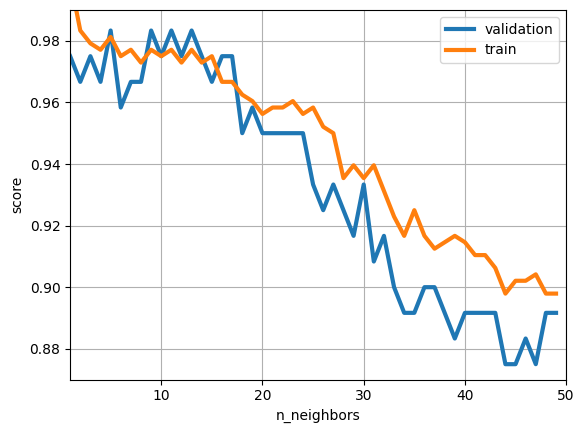

In [53]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          param_name='n_neighbors', 
                                          param_range=k, 
                                          cv=5)
plt.plot(k, val_score.mean(axis=1),label='validation', lw= 3)
plt.plot(k, train_score.mean(axis=1), label='train', lw=3)

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.grid(visible=True)
plt.axis([1,50, 0.87, 0.99])
plt.legend()
plt.show()

# Rechercher tous les meilleurs paramètres avec GridSearchCV

La méthode précédante de la recherche d'un meilleur hyperparamètre peut se généraliser à la recherche de plusieurs hyperparamètres en même temps avec la commande [GridSeachCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':np.arange(1,20),
            'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [40]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

# La matrice de confusion

La matrice de confusion est une méthode pour analyser plus en détails les éventuelles erreurs que peut faire notre modèle.


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

# Les courbes d'apprentissage

Les courbes d'apprentissage montre la performance du modèle avec le croissance du nombre de données. En effet, au bout d'un certain temps, il n'est plus nécessaire d'avoir plus de données, car l'amélioration de la reconnaissance n'évolue plus beaucoup.

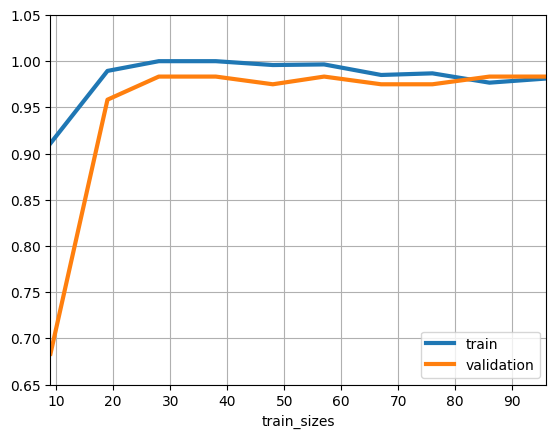

In [55]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1,1,10), cv=5)

plt.plot(N, train_score.mean(axis=1), label='train', lw=3)
plt.plot(N,val_score.mean(axis=1), label='validation', lw=3)
plt.grid(visible=True)
plt.axis([N[0], N[-1], 0.65, 1.05])
plt.xlabel('train_sizes')
plt.legend(loc = 'lower right')
plt.show()

On voit donc ici qu'à partir de 30 échantillons, on obtient plus d'amélioration sensible du modèle.

# On refait le titanic

Maintenant que nous avons vu toutes ces fonctions avancées, on les ré-utilise sur les données du titanic.

Refaisons d'abord notre jeu de données.

In [60]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)

# on déduit maintenant nos données
y = titanic['survived']
X = titanic.drop('survived', axis=1)
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [73]:
from sklearn.model_selection import train_test_split

# attention à bien convertir le dataframe X en ndarray à ce niveau.
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),y, test_size=0.2, random_state=5)

In [74]:
# je recherche les meilleurs paramètres

param_grid={'n_neighbors':np.arange(1,10),
            'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.7741723874904654
{'metric': 'manhattan', 'n_neighbors': 9}


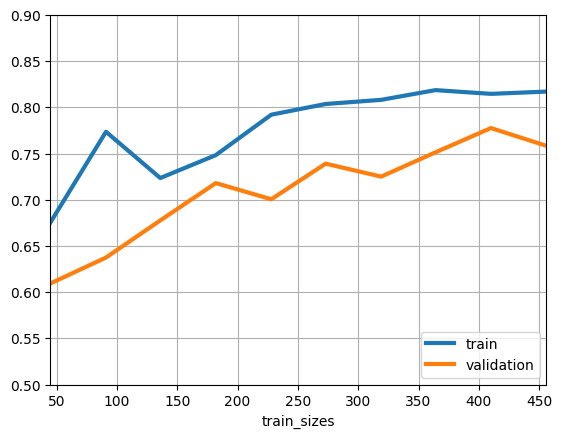

In [72]:
from sklearn.model_selection import learning_curve


N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1,1,10), cv=5)

plt.plot(N, train_score.mean(axis=1), label='train', lw=3)
plt.plot(N,val_score.mean(axis=1), label='validation', lw=3)
plt.grid(visible=True)
plt.axis([N[0], N[-1], 0.5, 0.9])
plt.xlabel('train_sizes')
plt.legend(loc = 'lower right')
plt.show()

In [83]:
# je prends le meilleur modèle
model = grid.best_estimator_

# model.fit(X.to_numpy(),y)
survie(model, pclass=2, sex=1, age=54)

[0]
chance de survie : 33%


# Utilisation de [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) pour reconnaître l'écriture.

Voici un exemple d'utilisation pour reconnaitre des images de chiffres écrits en manuscrit.

In [85]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

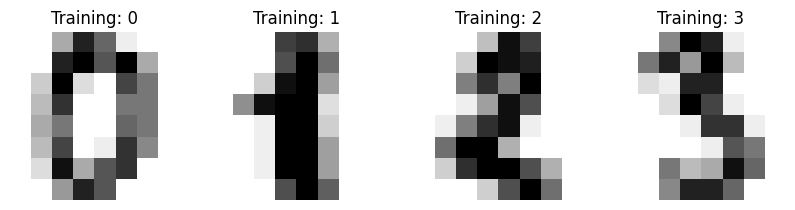

In [86]:
# chargement du jeu de données d'image de chiffre manuscrits
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

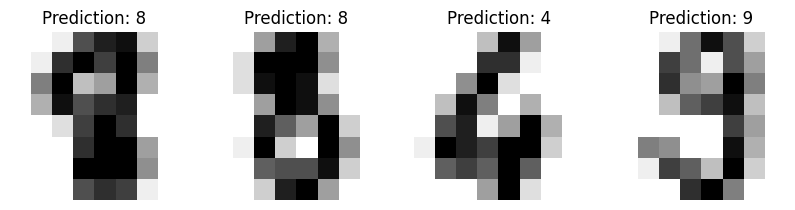

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


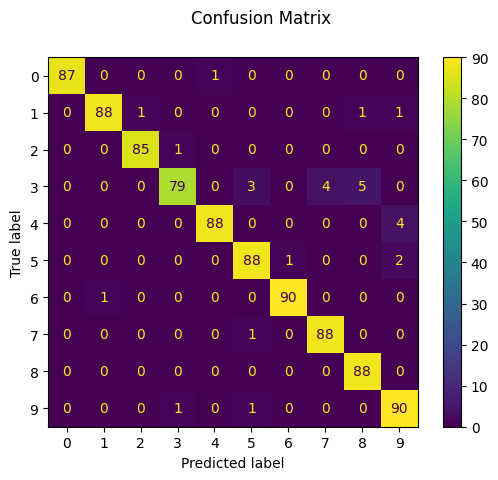

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)



Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


